Project delivered summer 2019. Latest dataset available was therefore 2015. Code should be easy to use coming years, but beware of variable mapping through the years.

# Overview

1. Data import
2. Data preparation
3. Modeling
4. Results
5. Conclusion

# 1. Data import

The PISA database contains the full set of responses from individual students, school principals and parents. Datasets for SAS or SPSS can be downloaded directly at their website: http://www.oecd.org/pisa/data/.

I have in this project downloaded the SAS-files and converted them into a dataframe.

## 1.1 Importing necessary libaries

The pandas library has commands for reading sas-files and writing the results to a csv.file.

In [1]:
import pandas as pd

## 1.2 Importing the data from local

I downloaded the student (https://webfs.oecd.org/pisa/PUF_SAS_COMBINED_CMB_STU_QQQ.zip) and school questionnaire (https://webfs.oecd.org/pisa/PUF_SAS_COMBINED_CMB_SCH_QQQ.zip) to a local path for this specific project. In order to reuse the code, you need to place the files in your own local directory and set the corresponding path.

In [2]:
# student dataset
student = pd.read_sas("Data\PISA2015\student.sas7bdat")

In [3]:
# school dataset
school = pd.read_sas("Data\PISA2015\school.sas7bdat")

Each student has a unique student id and a corresponding school id. School id (CNTSCHID) is used as key.

In [4]:
# merging the dataset
merge = pd.merge(student, school, on='CNTSCHID')

The "merge"-dataset contains all the data. At this stage I did an analysis on which variables I wanted to keep for my analysis as the dimension below displays that the dataset currently has 1193 variables.

In [5]:
# getting dimensions of dataset
merge.shape

(514397, 1193)

Preliminary analysis defined which variables to keep and they are all included in the script below. The selection is both based on previous research and variables of own interest. The PISA datasets are quite extensive, so my recommendation for understanding the questionnaires and its content is to use OECD's resources:

* Codebook (http://www.oecd.org/pisa/data/2015database/Codebook_CMB.xlsx)
* Student questionnaire (http://www.oecd.org/pisa/data/CY6_QST_MS_STQ_CBA_Final.pdf)
* School questionnaire (http://www.oecd.org/pisa/data/CY6_QST_MS_SCQ_CBA_Final.pdf)
* Assessment and Analytical Frameworks (http://www.oecd.org/edu/pisa-2015-assessment-and-analytical-framework-9789264281820-en.htm)
* Technical Reports (http://www.oecd.org/pisa/data/2015-technical-report/)
* Survey Implementation Tools (http://www.oecd.org/pisa/data/pisa-2018-documents-for-bidders.htm)

In [6]:
# defining subset for analysis
dataset = merge[['CNTRYID_x', 'CNT_x', 'CNTSCHID', 'CNTSTUID', 'Region_x', 'OECD_x', 'ADMINMODE_x', 'ST004D01T', 
                 'FISCED', 'MISCED', 'BMMJ1', 'BFMJ2', 'ST011Q04TA', 'ST011Q06TA', 'ST012Q01TA', 'ST012Q09NA', 
                 'ST013Q01TA', 'IMMIG', 'LANGN', 'ST124Q01TA', 'MOTIVAT', 'ST034Q06TA', 'SC001Q01TA', 'SC002Q01TA', 'SC002Q02TA', 'SC003Q01TA',
                 'SC053Q01TA', 'SC053Q10TA', 'SC052Q01NA', 'SC052Q02NA', 'SC010Q11TA', 'SC010Q11TB', 'SC010Q11TC',
                 'SC010Q11TD', 'SC010Q11TE', 'SC012Q01TA', 'SC013Q01TA', 'SC014Q01NA', 'PROATCE', 'SC036Q02TA', 
                 'SC042Q01TA', 'ESCS', 'TMINS', 'OUTHOURS', 'BSMJ', 'PV1SCIE', 'PV1READ', 'PV1MATH']]

As original column headers are quite difficult to interpret, I changed them to more suitable names and corresponding to my interpretation.

In [7]:
#Rename columns in subset
dataset = dataset.rename(columns={'CNTRYID_x': 'CountryID', 'CNT_x': 'Country', 'CNTSCHID': 'SchoolID', 'CNTSTUID': 'StudentID', 'Region_x': 'Region', 'OECD_x': 'OECDMember', 'ADMINMODE_x': 'AssessmentType', 'ST004D01T': 'Gender', 'FISCED': 'FathersHighestEducation', 'MISCED': 'MothersHighestEducation', 'BMMJ1': 'MothersOccupationalStatus', 'BFMJ2': 'FathersOccupationalStatus', 'ST011Q04TA': 'HaveComputer', 'ST011Q06TA': 'HaveInternet', 'ST012Q01TA': 'HaveTelevision', 'ST012Q09NA': 'HaveMusicalInstrument', 'ST013Q01TA': 'BooksAtHome', 'IMMIG': 'EthnicGroupCategory', 'LANGN': 'LanguageAtHome', 'ST124Q01TA': 'AttendKindergarten', 'motivat': 'Ambition/competitiveness', 'ST034Q06TA': 'IsLonely', 'SC001Q01TA': 'CommunitySize', 'SC002Q01TA': 'BoysInSchool', 'SC002Q02TA': 'GirlsInSchool','SC003Q01TA': 'AverageClassSize', 'SC053Q01TA': 'MusicActvityAtSchool', 'SC053Q10TA': 'SportsAtSchool', 'SC052Q01NA': 'AvailableRoomForHomework', 'SC052Q02NA': 'StaffHelpForHomework', 'SC010Q11TA': 'PrincipalCourseContent', 'SC010Q11TB': 'TeacherCourseContent', 'SC010Q11TC': 'SchoolGovernningBoardCourseContent', 'SC010Q11TD': 'RegionalAuthorityCourseContent', 'SC010Q11TE': 'NationalAuthorityCourseContent', 'SC012Q01TA': 'AcademicPerformanceAdmission', 'SC013Q01TA': 'SchoolType', 'SC014Q01NA': 'PrivateSchoolType', 'PROATCE': 'ProportionCertifiedTeacher', 'SC036Q02TA': 'StudentResultsTrackedCentrally', 'SC042Q01TA': 'GroupClassesByAbility', 'ESCS': 'EconomicalSocialStatus', 'TMINS': 'MinutesAtSchoolPerWeek', 'OUTHOURS': 'MinutesStudyingOutsideOfCLass', 'BSMJ': 'StudentsExpectedOccupationalStatus', 'PV1SCIE': 'ScoreScience', 'PV1READ': 'ScoreReading', 'PV1MATH': 'ScoreMathematics'})

The raw dataset is now imported into "dataset"-dataframe and is saved as csv-file for later upload to avoid repeatedly imports from the big original datafile. 

In [8]:
# saving as csv
dataset.to_csv('dataset_raw.csv')

# 2. Data preparation

This chapter will have all the processes and methods applied to the preparation of the final dataset used in the project.

## 2.1 Importing necessary libraries

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2.2 Importing raw data from csv

The dataset has already been defined through a mapping and research process. Variables in this dataset will be furtherly explored in this chapter.

In [10]:
#Importing csv-file
dataset = pd.read_csv('dataset_raw.csv')

## 2.3 Data exploration

Using head() and describe() to get insights into the variables in the dataset.

In [11]:
# to see all (100) columns in the query
pd.set_option('display.max_columns', 100)
# top 5 rows
dataset.head()

,Unnamed: 0,CountryID,Country,SchoolID,StudentID,Region,OECDMember,AssessmentType,Gender,FathersHighestEducation,MothersHighestEducation,MothersOccupationalStatus,FathersOccupationalStatus,HaveComputer,HaveInternet,HaveTelevision,HaveMusicalInstrument,BooksAtHome,EthnicGroupCategory,LanguageAtHome,AttendKindergarten,MOTIVAT,IsLonely,CommunitySize,BoysInSchool,GirlsInSchool,AverageClassSize,MusicActvityAtSchool,SportsAtSchool,AvailableRoomForHomework,StaffHelpForHomework,PrincipalCourseContent,TeacherCourseContent,SchoolGovernningBoardCourseContent,RegionalAuthorityCourseContent,NationalAuthorityCourseContent,AcademicPerformanceAdmission,SchoolType,PrivateSchoolType,ProportionCertifiedTeacher,StudentResultsTrackedCentrally,GroupClassesByAbility,EconomicalSocialStatus,MinutesAtSchoolPerWeek,MinutesStudyingOutsideOfCLass,StudentsExpectedOccupationalStatus,ScoreScience,ScoreReading,ScoreMathematics
0,0,8.0,b'ALB',800001.0,803627.0,800.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,196.0,295.0,7.0,2.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,NaN,1.0,2.0,3.0,NaN,NaN,NaN,NaN,517.092,429.846,462.940
1,1,8.0,b'ALB',800001.0,800454.0,800.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,196.0,295.0,7.0,2.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,NaN,1.0,2.0,3.0,NaN,NaN,NaN,NaN,479.635,462.788,430.100
2,2,8.0,b'ALB',800001.0,800893.0,800.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,196.0,295.0,7.0,2.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,NaN,1.0,2.0,3.0,NaN,NaN,NaN,NaN,446.930,503.169,302.612
3,3,8.0,b'ALB',800001.0,804180.0,800.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,196.0,295.0,7.0,2.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,NaN,1.0,2.0,3.0,NaN,NaN,NaN,NaN,383.794,569.626,336.522
4,4,8.0,b'ALB',800001.0,800491.0,800.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,196.0,295.0,7.0,2.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,NaN,1.0,2.0,3.0,NaN,NaN,NaN,NaN,412.304,389.138,290.929


In [12]:
# basic descriptive statistics of the data
dataset.describe()

,Unnamed: 0,CountryID,SchoolID,StudentID,Region,OECDMember,AssessmentType,Gender,FathersHighestEducation,MothersHighestEducation,MothersOccupationalStatus,FathersOccupationalStatus,HaveComputer,HaveInternet,HaveTelevision,HaveMusicalInstrument,BooksAtHome,EthnicGroupCategory,LanguageAtHome,AttendKindergarten,MOTIVAT,IsLonely,CommunitySize,BoysInSchool,GirlsInSchool,AverageClassSize,MusicActvityAtSchool,SportsAtSchool,AvailableRoomForHomework,StaffHelpForHomework,PrincipalCourseContent,TeacherCourseContent,SchoolGovernningBoardCourseContent,RegionalAuthorityCourseContent,NationalAuthorityCourseContent,AcademicPerformanceAdmission,SchoolType,PrivateSchoolType,ProportionCertifiedTeacher,StudentResultsTrackedCentrally,GroupClassesByAbility,EconomicalSocialStatus,MinutesAtSchoolPerWeek,MinutesStudyingOutsideOfCLass,StudentsExpectedOccupationalStatus,ScoreScience,ScoreReading,ScoreMathematics
count,514397.000000,514397.000000,5.143970e+05,5.143970e+05,514397.000000,514397.000000,514397.000000,514397.000000,482196.000000,490794.000000,361280.000000,411084.000000,493811.000000,493685.000000,495741.000000,493498.000000,496440.000000,489742.000000,498267.000000,63934.000000,427550.000000,479905.000000,475563.000000,445493.000000,446705.000000,470080.000000,463359.000000,470580.000000,476477.000000,475772.000000,483050.000000,483050.000000,483050.000000,468013.000000,478040.000000,474823.000000,460819.000000,121362.0000,429510.000000,473032.000000,466172.000000,498493.000000,372082.000000,367938.000000,412259.000000,514397.000000,514397.000000,514397.000000
mean,257198.000000,463.136264,4.631450e+07,4.632068e+07,44459.209511,0.609024,1.862876,1.498871,4.014326,4.043146,45.975684,43.973113,1.144513,1.105547,3.152731,2.064290,2.965970,1.179544,359.464512,2.248334,0.089388,3.237093,3.140951,456.682363,452.576045,4.126887,1.429779,1.077808,1.355478,1.456172,0.227455,0.565310,0.118437,0.211520,0.446787,2.086961,1.206643,1.8774,0.815826,1.230335,2.436521,-0.258934,1640.851162,18.957246,61.020155,469.343664,465.468811,463.162704
std,148493.767548,293.751344,2.937498e+07,2.937547e+07,27161.422680,0.603171,0.343978,0.499999,1.733726,1.730985,22.498292,22.017307,0.351609,0.307257,0.830894,1.109965,1.462916,0.517593,189.577346,0.832303,0.986091,0.869480,1.188405,474.755386,468.520004,1.865882,0.495045,0.267870,0.478658,0.498076,0.419189,0.495717,0.323125,0.408386,0.497161,0.879588,0.404898,0.6803,0.317326,0.421048,0.679560,1.109030,417.520650,14.328448,17.432371,102.327958,106.065858,103.309749
min,0.000000,8.000000,8.000010e+05,8.000010e+05,800.000000,0.000000,1.000000,1.000000,0.000000,0.000000,11.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,1.000000,-3.087700,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,1.000000,1.000000,-7.260200,0.000000,0.000000,10.000000,25.103000,0.000000,0.000000
25%,128599.000000,191.000000,1.910012e+07,1.910480e+07,19100.000000,0.000000,2.000000,1.000000,3.000000,3.000000,25.000000,26.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,160.000000,1.000000,-0.564300,3.000000,2.000000,189.000000,183.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.809800,1.000000,2.000000,-1.002500,1440.000000,8.000000,47.000000,394.085000,392.421000,389.539000
50%,257198.000000,422.000000,4.220024e+07,4.220430e+07,42200.000000,1.000000,2.000000,1.000000,4.000000,4.000000,44.000000,36.000000,1.000000,1.000000,3.000000,2.000000,3.000000,1.000000,313.000000,3.000000,-0.041300,3.000000,3.000000,347.000000,346.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.0000,0.989900,1.000000,3.000000,-0.184300,1600.000000,15.000000,64.000000,467.900000,470.023000,463.796000
75%,385797.000000,724.000000,7.240047e+07,7.241619e+07,72400.000000,1.000000,2.0000

Looking at the data, I see that "Country" has some extra characters. I just want to keep the country code.

In [13]:
# assigning substring to variable
dataset['Country'] = dataset['Country'].str.slice(2,5)

I drop some already irrelevant variables. The "AttendKindergarten" was found to have opposite response patterns to other variables and had a lot of missing values, so I dropped it already here.

As StudentsExpectedOccupationalStatus is part of MOTIVAT, we decide to not drop this one as it is seemingly more tangible than the index itself.

In [14]:
dataset.drop(columns=['OECDMember', 'Unnamed: 0', 'AssessmentType', 'HaveTelevision', 'AttendKindergarten', 'PrivateSchoolType', 'MinutesAtSchoolPerWeek', 'MinutesStudyingOutsideOfCLass', 'MOTIVAT', 'SportsAtSchool', 'LanguageAtHome', 'AverageClassSize', 'AcademicPerformanceAdmission'], inplace=True)

### 2.3.1 Missing values

The following sub-chapter shows which processes were applied to mitigate the problem of missing values.

In [15]:
# overview of variables and count of missing data
dataset.isnull().sum()

CountryID                                  0
Country                                    0
SchoolID                                   0
StudentID                                  0
Region                                     0
Gender                                     0
FathersHighestEducation                32201
MothersHighestEducation                23603
MothersOccupationalStatus             153117
FathersOccupationalStatus             103313
HaveComputer                           20586
HaveInternet                           20712
HaveMusicalInstrument                  20899
BooksAtHome                            17957
EthnicGroupCategory                    24655
IsLonely                               34492
CommunitySize                          38834
BoysInSchool                           68904
GirlsInSchool                          67692
MusicActvityAtSchool                   51038
AvailableRoomForHomework               37920
StaffHelpForHomework                   38625
PrincipalC

I create another dataframe to work with whilst cleaning the dataset.

In [16]:
dataset_exl_missingvalues = dataset

The following sub-chapters are divided into variables and the treatment of missing values.

#### 2.3.1.1 Parental education

It is difficult to anticipate or predict which values to impute into parents' education, so we decide to drop the variables.

In [17]:
# dropping all observation with missing values
dataset_exl_missingvalues = dataset_exl_missingvalues.dropna(subset=['FathersHighestEducation', 'MothersHighestEducation']) 

#### 2.3.1.2 Parental occupational status

Occupational status in the PISA data was coded to four-digit ISCO codes and then mapped to the International Socio-Economic Index of occupational status (ISEI) (Ganzeboom et al., 1992).

Higher implies better job.

Assuming that cases where both parents' are lacking response, that it is an error and should be removed. The ones with one missing will be treated later.

In [18]:
# dropping missing values in parents' occupational status where both variables are missing for the observation
dataset_exl_missingvalues = dataset_exl_missingvalues.dropna(subset=['FathersOccupationalStatus', 'MothersOccupationalStatus'], thresh=1) 

#### 2.3.1.3 HomePossesions (Computer, internet, television, musical instrument, books at home)

In [19]:
# dropping all observation with missing values
dataset_exl_missingvalues = dataset_exl_missingvalues.dropna(subset=['HaveComputer', 'HaveInternet', 'HaveMusicalInstrument', 'BooksAtHome']) 

#### 2.3.1.4 Ethnic group category

We have no reliable information that can help us predict what the ethnic group category for the missing values. They are dropped from the dataset.

In [20]:
dataset_exl_missingvalues = dataset_exl_missingvalues.dropna(subset=['EthnicGroupCategory']) 

#### 2.3.1.5 School variables

As it is very difficult to compute or do any particular reasong on what to impute to the missing school variables, we decide to drop this in our initial analysis.

In [21]:
dataset_exl_missingvalues = dataset_exl_missingvalues.dropna(subset=['CommunitySize', 'MusicActvityAtSchool', 'StaffHelpForHomework', 'AvailableRoomForHomework', 'PrincipalCourseContent', 'TeacherCourseContent', 'SchoolGovernningBoardCourseContent', 'RegionalAuthorityCourseContent', 'NationalAuthorityCourseContent', 'SchoolType', 'ProportionCertifiedTeacher', 'StudentResultsTrackedCentrally', 'GroupClassesByAbility', 'StudentsExpectedOccupationalStatus', 'BoysInSchool', 'GirlsInSchool']) 

Given this, the dataset is currently cleaned for missing values and the further process is to finalise the variables that are going to be used in the final analysis.

In [22]:
# assigning the cleaned dataset to "dataset"
dataset = dataset_exl_missingvalues

## 2.4 Data wrangling

The following chapter shows the tranformation of the variables. One-hot-encoding is frequently used as educational and personal data is complex and that binary information is more interpretable.

There are certain ID columns that identify the unit of analysis. These are:

* CountryID - numerical value for country
* Country - string value for country
* School ID - numerical value for school
* Student ID - numerical value for student
* Region - numerical value for region

I'm using student ID as unit of analysis in this project.

### 2.4.1 Wrangling variables with missing values

#### 2.4.1.1 Parental occupational status

We still have some observation with missing values. However, these are cases where occupational status is given for either of the parents. We assume that responses are intentionally left blank for unemployed parents and that these cases are represented by these blank observations.

We then create binary variable for this cases.

In [23]:
#FatherIsUnemployed
dataset['FatherIsUnemployed'] = 0
dataset.loc[(dataset.FathersOccupationalStatus.isnull()), 'FatherIsUnemployed'] = 1

In [24]:
#MotherIsUnemployed
dataset['MotherIsUnemployed'] = 0
dataset.loc[(dataset.MothersOccupationalStatus.isnull()), 'MotherIsUnemployed'] = 1

Fathers' occupation:

First, splitting the index for occupational status into three categories.

In [25]:
#Splitting fathers occupational status into three categories (low, middle and high)
dataset['FatherOccupation'] = pd.qcut(dataset['FathersOccupationalStatus'], 3)
dataset[['FatherOccupation', 'ScoreReading', 'ScoreMathematics', 'ScoreScience']].groupby(['FatherOccupation'], as_index=False).mean().sort_values(by='FatherOccupation', ascending=True)

,FatherOccupation,ScoreReading,ScoreMathematics,ScoreScience
0,"(10.999, 28.0]",455.748947,451.190674,458.673240
1,"(28.0, 52.0]",473.770975,469.289113,475.991287
2,"(52.0, 89.0]",509.081252,504.638362,512.822534


Based on these ranges, we create three categories:

In [26]:
#FatherLowOccoupationalStatus
dataset['FatherLowOccupationalStatus'] = 0
dataset.loc[(dataset.FathersOccupationalStatus <= 28), 'FatherLowOccupationalStatus'] = 1

#FatherMiddleOccoupationalStatus
dataset['FatherMiddleOccupationalStatus'] = 0
dataset.loc[(dataset.FathersOccupationalStatus > 28) & (dataset.FathersOccupationalStatus <= 52), 'FatherMiddleOccupationalStatus'] = 1

#FatherHighOccoupationalStatus
dataset['FatherHighOccupationalStatus'] = 0
dataset.loc[(dataset.FathersOccupationalStatus > 52), 'FatherHighOccupationalStatus'] = 1

Mothers' occupation:

First, splitting the index for occupational status into three categories.

In [27]:
#Splitting mothers occupational status into three categories (low, middle and high)
dataset['MotherOccupation'] = pd.qcut(dataset['MothersOccupationalStatus'], 3)
dataset[['MotherOccupation', 'ScoreReading', 'ScoreMathematics', 'ScoreScience']].groupby(['MotherOccupation'], as_index=False).mean().sort_values(by='MotherOccupation', ascending=True)

,MotherOccupation,ScoreReading,ScoreMathematics,ScoreScience
0,"(10.999, 29.0]",459.449195,455.707222,462.713576
1,"(29.0, 58.0]",491.393212,486.165527,493.191693
2,"(58.0, 89.0]",512.588647,507.134073,515.406676


Based on these ranges, we create three categories:

In [28]:
#MotherLowOccoupationalStatus
dataset['MotherLowOccupationalStatus'] = 0
dataset.loc[(dataset.MothersOccupationalStatus <= 29), 'MotherLowOccupationalStatus'] = 1

#MotherMiddleOccoupationalStatus
dataset['MotherMiddleOccupationalStatus'] = 0
dataset.loc[(dataset.MothersOccupationalStatus > 29) & (dataset.MothersOccupationalStatus <= 58), 'MotherMiddleOccupationalStatus'] = 1
#MotherHighOccoupationalStatus
dataset['MotherHighOccupationalStatus'] = 0
dataset.loc[(dataset.MothersOccupationalStatus > 58), 'MotherHighOccupationalStatus'] = 1

Dropping the base variables

In [29]:
dataset.drop(columns=['MothersOccupationalStatus', 'FathersOccupationalStatus', 'FatherOccupation', 'MotherOccupation'], inplace=True)

#### 2.4.1.2 IsLonely

Describing the categorical variable.

In [30]:
dataset['IsLonely'].describe()

count    244413.000000
mean          3.263186
std           0.855002
min           1.000000
25%           3.000000
50%           3.000000
75%           4.000000
max           4.000000
Name: IsLonely, dtype: float64

Creating a new dataset to explore missing values for this variable and compare it with students that actually feel lonely.

In [31]:
# dataset IsLonely where missing
IsLonely = dataset[dataset.IsLonely.isnull()]
IsLonely['ScoreScience'].describe()

count    2824.000000
mean      397.360093
std        94.084644
min       163.688000
25%       330.786750
50%       385.324500
75%       454.423000
max       743.621000
Name: ScoreScience, dtype: float64

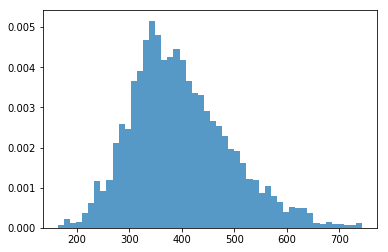

In [32]:
# the histogram of the data
plt.hist(IsLonely['ScoreScience'], bins=50, density=True, alpha=0.75)
plt.show()

In [33]:
# dataset IsLonely where strongly agree that student feels lonely
IsLonely = dataset.loc[dataset['IsLonely'] <= 1]
IsLonely['ScoreScience'].describe()

count    15013.000000
mean       453.845998
std         94.355477
min        158.129000
25%        383.902000
50%        449.921000
75%        519.311000
max        800.526000
Name: ScoreScience, dtype: float64

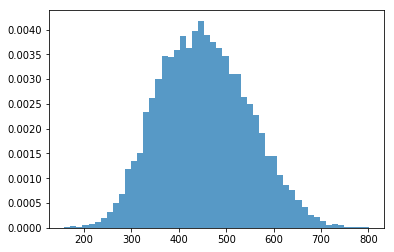

In [34]:
# the histogram of the data
plt.hist(IsLonely['ScoreScience'], bins=50, density=True, alpha=0.75)
plt.show()

I decide to include the observations with missing values to the group that feels lonely as it seems to be more similar behaviour on this variable.

In [35]:
values = {'IsLonely': 1}
dataset.fillna(inplace=True, value=values)

### 2.4.2 Wrangling normal variables

#### 2.4.2.1 Gender

Originally value takes female = 1 and male = 2. We convert this by the variable by one.

In [36]:
# subtracting 'Gender' by one
dataset['Gender'] = dataset['Gender']-1

In [37]:
# renaming the column to IsMale
dataset = dataset.rename(columns={'Gender': 'IsMale'})

#### 2.4.2.2 FatherHighestEducation and MothersHighestEducation

ISCED varies from 0-6. The ISCED levels were classified through the following enumeration:
 * ISCED 0: None / Pre-primary education
 * ISCED 1: Primary education
 * ISCED 2: Lower secondary education
 * ISCED 3B or 3C: Vocational or pre-vocational upper secondary schooling
 * ISCED 3A and/or 4: General upper secondary and/or non-tertiary post-secondary schooling
 * ISCED 5B: Vocational tertiary education
 * ISCED 5A and/or 6: Theoretically oriented tertiary and/or post-graduate education
 
We divide this into three dichotomous variables where:
 * ISCED 0 = 0
 * CumpolsorySchool = ISCED 1 and 2
 * HighSchool = ISCED 3 and 4
 * HigherEducation = ISCED 5 and 6

In [38]:
# describing the variables
dataset[['FathersHighestEducation', 'MothersHighestEducation']].describe()

,FathersHighestEducation,MothersHighestEducation
count,247237.000000,247237.000000
mean,4.045297,4.072752
std,1.717780,1.723997
min,0.000000,0.000000
25%,3.000000,3.000000
50%,4.000000,4.000000
75%,6.000000,6.000000
max,6.000000,6.000000


Father:

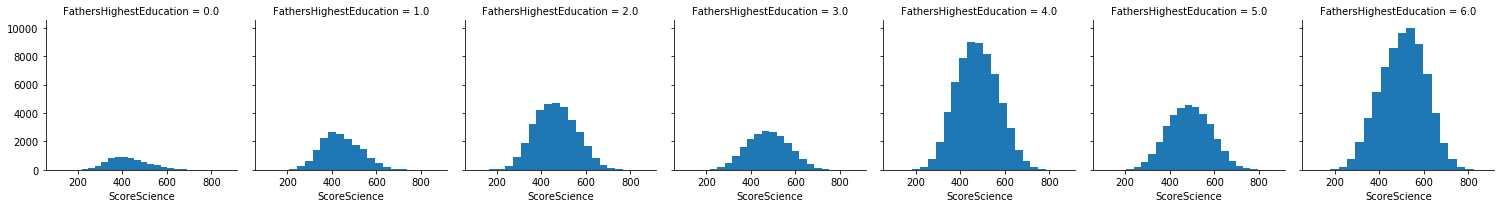

In [39]:
g = sns.FacetGrid(dataset, col='FathersHighestEducation')
g.map(plt.hist, 'ScoreScience', bins=20)

Based on this, we create variables depending on educational levels.

In [40]:
#CompulsorySchool
dataset['FatherCompulsorySchoolIsHighest'] = 0
dataset.loc[(dataset.FathersHighestEducation == 1) | (dataset.FathersHighestEducation == 2), 'FatherCompulsorySchoolIsHighest'] = 1

#HighSchool
dataset['FatherHighSchoolIsHighest'] = 0
dataset.loc[(dataset.FathersHighestEducation == 3) | (dataset.FathersHighestEducation == 4), 'FatherHighSchoolIsHighest'] = 1

#HigherEducation
dataset['FatherHigherEducationIsHighest'] = 0
dataset.loc[(dataset.FathersHighestEducation == 5) | (dataset.FathersHighestEducation == 6), 'FatherHigherEducationIsHighest'] = 1

Mother:

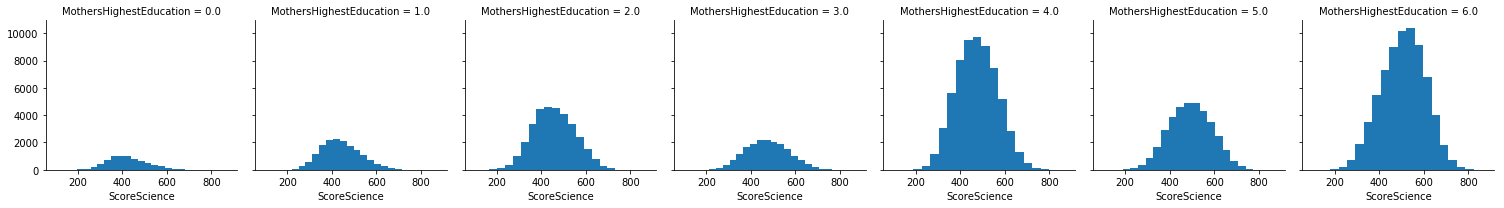

In [41]:
# Score histograms with the different educational groups
g = sns.FacetGrid(dataset, col='MothersHighestEducation')
g.map(plt.hist, 'ScoreScience', bins=20)

Based on this, we create variables depending on educational levels.

In [42]:
#CompulsorySchool
dataset['MotherCompulsorySchoolIsHighest'] = 0
dataset.loc[(dataset.MothersHighestEducation == 1) | (dataset.MothersHighestEducation == 2), 'MotherCompulsorySchoolIsHighest'] = 1

#HighSchool
dataset['MotherHighSchoolIsHighest'] = 0
dataset.loc[(dataset.MothersHighestEducation == 3) | (dataset.MothersHighestEducation == 4), 'MotherHighSchoolIsHighest'] = 1

#HigherEducation
dataset['MotherHigherEducationIsHighest'] = 0
dataset.loc[(dataset.MothersHighestEducation == 5) | (dataset.MothersHighestEducation == 6), 'MotherHigherEducationIsHighest'] = 1

After we have finished the one-hot encoding of the educational variable we drop the original variables.

In [43]:
dataset = dataset.drop(columns=['MothersHighestEducation', 'FathersHighestEducation']) 

#### 2.4.2.3 Home possesions

In [44]:
# descriptive statistics
dataset[['HaveComputer', 'HaveInternet', 'HaveMusicalInstrument', 'BooksAtHome']].describe()

,HaveComputer,HaveInternet,HaveMusicalInstrument,BooksAtHome
count,247237.000000,247237.000000,247237.000000,247237.000000
mean,1.139000,1.105352,2.070855,3.012073
std,0.345947,0.307008,1.101340,1.436336
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000
50%,1.000000,1.000000,2.000000,3.000000
75%,1.000000,1.000000,3.000000,4.000000
max,2.000000,2.000000,4.000000,6.000000


In [45]:
#HaveComputer - original (1 = yes and 2 = no)
dataset.loc[(dataset.HaveComputer == 2), 'HaveComputer'] = 0

In [46]:
#HaveInternet - original (1 = yes and 2 = no)
dataset.loc[(dataset.HaveInternet == 2), 'HaveInternet'] = 0

In [47]:
#HaveMusicalInstrument - original (1 = none, 2 = one, 3 = two, 4 = three or more). We transform this into no = 0 and yes = 1.
dataset.loc[(dataset.HaveMusicalInstrument == 1), 'HaveMusicalInstrument'] = 0
dataset.loc[(dataset.HaveMusicalInstrument > 1), 'HaveMusicalInstrument'] = 1

Grouping the mean score for each category within books at home.

In [48]:
dataset[['BooksAtHome', 'ScoreMathematics', 'ScoreScience', 'ScoreReading']].groupby(['BooksAtHome'], as_index=False).mean().sort_values(by='BooksAtHome', ascending=True)

,BooksAtHome,ScoreMathematics,ScoreScience,ScoreReading
0,1.0,413.907301,422.123149,418.142527
1,2.0,439.197963,447.777547,445.734608
2,3.0,481.688318,488.013532,485.588488
3,4.0,506.456024,513.633675,511.090168
4,5.0,531.722253,539.168026,536.131305
5,6.0,527.008336,534.018942,528.741196


It seems to be no clear difference between category 5 and 6. The original categories were

* 0-10 (1)
* 11-25 (2)
* 26-100 (3)
* 101-200 (4)
* 201-500 (5)
* 500+ (6)

books at home. We merge category 5 and 6.

In [49]:
dataset.loc[(dataset.BooksAtHome == 6), 'BooksAtHome'] = 5

#### 2.4.2.4 Ethnic group category

This variable was originally defined:
* Native (1)
* 2nd-generation immigrant (2)
* 1st-generation immigrant (3)

where they in the PISA dataset define natives as students with at least one parent born in the country, second-generation immigrants as those born in the country of assessment but whose parent(s) were born in
another country and 3) first-generation immigrants as cases where both the student and parent(s) where born
outside the country of assessment. 

We change this variable into native(0) and immigrant(1).

In [50]:
dataset.loc[(dataset.EthnicGroupCategory == 1), 'EthnicGroupCategory'] = 0
dataset.loc[(dataset.EthnicGroupCategory == 2), 'EthnicGroupCategory'] = 1
dataset.loc[(dataset.EthnicGroupCategory == 3), 'EthnicGroupCategory'] = 1

#### 2.4.2.5 IsLonely

The student questionnaire poses the question:
    
To what extent do you agree with the following statements? 

* 1) Strongly agree
* 2) Agree
* 3) Disagree
* 4) Strongly disagree

In [51]:
# descriptive statistics
dataset[['IsLonely']].describe()

,IsLonely
count,247237.000000
mean,3.237335
std,0.883468
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,4.000000


In [52]:
# scores
dataset[['IsLonely', 'ScoreMathematics', 'ScoreScience', 'ScoreReading']].groupby(['IsLonely'], as_index=True).mean().sort_values(by='IsLonely', ascending=True)

,ScoreMathematics,ScoreScience,ScoreReading
IsLonely,,,
1.0,436.000679,444.903003,437.776679
2.0,468.643386,478.474580,473.731573
3.0,475.740215,483.646581,480.497101
4.0,478.396637,484.733381,483.054748


Based on the answers, we split the variable into whether the student is feeling lonely or not by transforming "IsLonely" = 3 or  "IsLonely" = 4 to be equal to one, else equals zero.

In [53]:
dataset.loc[(dataset.IsLonely == 2), 'IsLonely'] = 1
dataset.loc[(dataset.IsLonely > 2), 'IsLonely'] = 0

#### 2.4.2.6 Community size

This variable was originally split into following categories:

* 1) A village, hamlet or rural area (fewer than 3 000 people)
* 2) A small town (3 000 to about 15 000 people)
* 3) A town (15 000 to about 100 000 people)
* 4) A city (100 000 to about 1 000 000 people)
* 5) A large city (with over 1 000 000 people)

Based on these observations we create a variable splitting the data into whether it is a city (4 og 5), else zero.

In [54]:
dataset['IsCity'] = 0
dataset.loc[(dataset.CommunitySize > 3), 'IsCity'] = 1
dataset.drop(columns=['CommunitySize'], inplace=True)

#### 2.4.2.7 Male gender ratio

We have from the school questionnaire the possibility to calculate gender ratio in schools as we have the number of boys and girls enrolled in each school. We create this variable.

In [55]:
dataset[['BoysInSchool', 'GirlsInSchool']].describe()

,BoysInSchool,GirlsInSchool
count,247237.000000,247237.000000
mean,474.660205,473.132197
std,510.015382,509.047756
min,0.000000,0.000000
25%,188.000000,185.000000
50%,350.000000,354.000000
75%,597.000000,598.000000
max,8500.000000,9305.000000


Calculating gender ratio (male) as a new ratio.

In [56]:
dataset['MaleSchoolRatio'] = dataset['BoysInSchool'] / (dataset['BoysInSchool'] + dataset['GirlsInSchool'])

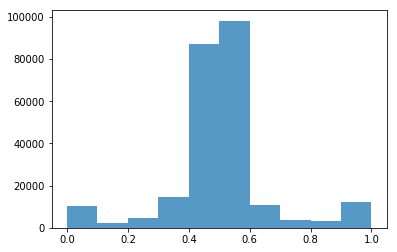

In [57]:
# the histogram of the data
plt.hist(dataset['MaleSchoolRatio'], bins=10, alpha=0.75)
plt.show()

In [58]:
# dropping the base variables
dataset.drop(columns=['BoysInSchool', 'GirlsInSchool'], inplace=True)

#### 2.4.2.8 Various activities at school

Basic descriptive statistics:

In [59]:
dataset[['MusicActvityAtSchool', 'AvailableRoomForHomework', 'StaffHelpForHomework']].describe()

,MusicActvityAtSchool,AvailableRoomForHomework,StaffHelpForHomework
count,247237.000000,247237.000000,247237.000000
mean,1.424111,1.357091,1.472939
std,0.494208,0.479143,0.499268
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000


MusicActvityAtSchool:

In [60]:
#MusicActivityAtSchool
dataset[['MusicActvityAtSchool', 'ScoreMathematics', 'ScoreScience', 'ScoreReading']].groupby(['MusicActvityAtSchool'], as_index=True).mean().sort_values(by='MusicActvityAtSchool', ascending=True)

,ScoreMathematics,ScoreScience,ScoreReading
MusicActvityAtSchool,,,
1.0,487.476126,495.023995,491.568351
2.0,454.562275,461.782253,459.671409


In [61]:
# not having the activity (i.e. value 2 in the dataset) equal zero
dataset.loc[(dataset.MusicActvityAtSchool == 2), 'MusicActvityAtSchool'] = 0

The school questionnaire poses the question:

"For 15-year-old students, does your school provide the
following study help?"

* Q1: Room(s) where the students can do their homework (1 (yes) or 2 (no))
* Q2: Staff help with homework (1 (yes) or 2 (no))

In [62]:
# not having the activity (i.e. value 2 in the dataset) equal zero
dataset.loc[(dataset.AvailableRoomForHomework == 2), 'AvailableRoomForHomework'] = 0
dataset.loc[(dataset.StaffHelpForHomework == 2), 'StaffHelpForHomework'] = 0

In [63]:
#AvailableRoomForHomework
dataset[['AvailableRoomForHomework', 'ScoreMathematics', 'ScoreScience', 'ScoreReading']].groupby(['AvailableRoomForHomework'], as_index=True).mean().sort_values(by='AvailableRoomForHomework', ascending=True)

,ScoreMathematics,ScoreScience,ScoreReading
AvailableRoomForHomework,,,
0.0,453.742906,462.258315,459.702194
1.0,484.500091,491.294259,488.226125


In [64]:
#StaffHelpForHomework
dataset[['StaffHelpForHomework', 'ScoreMathematics', 'ScoreScience', 'ScoreReading']].groupby(['StaffHelpForHomework'], as_index=True).mean().sort_values(by='StaffHelpForHomework', ascending=True)

,ScoreMathematics,ScoreScience,ScoreReading
StaffHelpForHomework,,,
0.0,464.800104,472.399611,471.506180
1.0,481.338769,488.576458,483.903828


#### 2.4.2.9 Determining school content

We want to see how different instances controlling what the school content is affects students' performance. Value equal 1 implies that the indicated instance sets the course contents.

In [65]:
#Principal
dataset[['PrincipalCourseContent', 'ScoreMathematics', 'ScoreScience', 'ScoreReading']].groupby(['PrincipalCourseContent'], as_index=True).mean().sort_values(by='PrincipalCourseContent', ascending=True)

,ScoreMathematics,ScoreScience,ScoreReading
PrincipalCourseContent,,,
0.0,469.158641,476.778360,474.257838
1.0,487.474897,494.208242,490.154718


In [66]:
#Teacher
dataset[['TeacherCourseContent', 'ScoreMathematics', 'ScoreScience', 'ScoreReading']].groupby(['TeacherCourseContent'], as_index=True).mean().sort_values(by='TeacherCourseContent', ascending=True)

,ScoreMathematics,ScoreScience,ScoreReading
TeacherCourseContent,,,
0.0,458.880174,468.997707,465.629713
1.0,484.710950,490.048174,487.532031


In [67]:
#SchoolGovernningBoard
dataset[['SchoolGovernningBoardCourseContent', 'ScoreMathematics', 'ScoreScience', 'ScoreReading']].groupby(['SchoolGovernningBoardCourseContent'], as_index=True).mean().sort_values(by='SchoolGovernningBoardCourseContent', ascending=True)

,ScoreMathematics,ScoreScience,ScoreReading
SchoolGovernningBoardCourseContent,,,
0.0,472.735931,480.143779,477.644767
1.0,479.519705,486.935873,481.081828


In [68]:
#RegionalAuthority
dataset[['RegionalAuthorityCourseContent', 'ScoreMathematics', 'ScoreScience', 'ScoreReading']].groupby(['RegionalAuthorityCourseContent'], as_index=True).mean().sort_values(by='RegionalAuthorityCourseContent', ascending=True)

,ScoreMathematics,ScoreScience,ScoreReading
RegionalAuthorityCourseContent,,,
0.0,471.393749,478.685035,475.734111
1.0,480.720778,488.528314,485.865665


In [69]:
#NationalAuthority
dataset[['NationalAuthorityCourseContent', 'ScoreMathematics', 'ScoreScience', 'ScoreReading']].groupby(['NationalAuthorityCourseContent'], as_index=True).mean().sort_values(by='NationalAuthorityCourseContent', ascending=True)

,ScoreMathematics,ScoreScience,ScoreReading
NationalAuthorityCourseContent,,,
0.0,483.569725,489.896306,485.562061
1.0,461.053301,469.803884,468.715033


Creating variable that distinguish schools where course contents are determined by a central authority.

In [70]:
#Changing the variables that has values that were answered for either regional or national authority, and not either of the other options
dataset['CentralAuthorityDecidesCourseContents'] = 0
dataset.loc[((dataset.NationalAuthorityCourseContent == 1) | (dataset.RegionalAuthorityCourseContent == 1)) & (dataset.SchoolGovernningBoardCourseContent == 0) & (dataset.TeacherCourseContent == 0) & (dataset.PrincipalCourseContent == 0), 'CentralAuthorityDecidesCourseContents'] = 1

In [71]:
#CentralAuthority
dataset[['CentralAuthorityDecidesCourseContents', 'ScoreMathematics', 'ScoreScience', 'ScoreReading']].groupby(['CentralAuthorityDecidesCourseContents'], as_index=True).mean().sort_values(by='CentralAuthorityDecidesCourseContents', ascending=True)

,ScoreMathematics,ScoreScience,ScoreReading
CentralAuthorityDecidesCourseContents,,,
0,484.241662,490.092023,486.637692
1,452.956583,463.353105,461.558706


In [72]:
# dropping base variables
dataset.drop(columns=['NationalAuthorityCourseContent', 'RegionalAuthorityCourseContent', 'SchoolGovernningBoardCourseContent', 'TeacherCourseContent', 'PrincipalCourseContent'], inplace=True)

#### 2.4.2.10 School type

Public (1) and private school (2).

In [73]:
#SchoolType
dataset[['SchoolType', 'ScoreMathematics', 'ScoreScience', 'ScoreReading']].groupby(['SchoolType'], as_index=True).mean().sort_values(by='SchoolType', ascending=True)

,ScoreMathematics,ScoreScience,ScoreReading
SchoolType,,,
1.0,468.065961,475.398483,472.279998
2.0,493.172075,500.855945,498.811457


Substracting by one and changing variable header to "IsPrivateSchool".

In [74]:
#Subtracting 'SchoolType' by 1
dataset['SchoolType'] = dataset['SchoolType']-1
dataset.rename(columns={'SchoolType': 'IsPrivateSchool'}, inplace=True)

#### 2.4.2.11 ProportionCertifiedTeachers

The variable explaining to which extent the teachers at the school has certifications.

In [75]:
dataset['ProportionCertifiedTeacher'].describe()

count    247237.000000
mean          0.812355
std           0.322303
min           0.000000
25%           0.800000
50%           0.996900
75%           1.000000
max           1.000000
Name: ProportionCertifiedTeacher, dtype: float64

I create a dummy variable that differentiates having fully certified teacher staff and not, and then check the mean scores across the groups.

In [76]:
dataset.loc[(dataset.ProportionCertifiedTeacher < 1), 'ProportionCertifiedTeacher'] = 0
dataset[['ProportionCertifiedTeacher', 'ScoreMathematics', 'ScoreScience', 'ScoreReading']].groupby(['ProportionCertifiedTeacher'], as_index=True).mean().sort_values(by='ProportionCertifiedTeacher', ascending=True)

,ScoreMathematics,ScoreScience,ScoreReading
ProportionCertifiedTeacher,,,
0.0,461.913644,470.561550,467.584872
1.0,485.152389,491.318674,488.525006


We observe that there is a difference between the groups and create the variable. Change the header name to "FullyCertifiedTeacherStaff".

In [77]:
dataset.rename(columns={'ProportionCertifiedTeacher': 'FullyCertifiedTeacherStaff'}, inplace=True)

#### 2.4.2.12 StudentsTrackedCentrally

The variables is indicated through whether achievement data are tracked over time by an administrative authority; yes(1) and no(2). Use a command to see mean scores across groups:

In [78]:
dataset[['StudentResultsTrackedCentrally', 'ScoreMathematics', 'ScoreScience', 'ScoreReading']].groupby(['StudentResultsTrackedCentrally'], as_index=True).mean().sort_values(by='StudentResultsTrackedCentrally', ascending=True)

,ScoreMathematics,ScoreScience,ScoreReading
StudentResultsTrackedCentrally,,,
1.0,467.511224,476.150399,474.508327
2.0,492.978563,496.400384,489.486432


It seems to be a difference. We keep the variable. But we change variable equals two to zero - i.e one implying that it is tracked centrally, while zero means no.

In [79]:
dataset.loc[(dataset.StudentResultsTrackedCentrally == 2), 'StudentResultsTrackedCentrally'] = 0

#### 2.4.2.13 GroupClassesByAbility

Students are grouped by ability into different classes. 
* For all subjects (1)
* For some subjects (2)
* Not for any subjects (3)

We choose to split this variable into:

* Not divided by ability (1)
* Divided by ability (0)

We rename the variable into ClassesNotDividedByAbility.

In [80]:
dataset[['GroupClassesByAbility', 'ScoreMathematics', 'ScoreScience', 'ScoreReading']].groupby(['GroupClassesByAbility'], as_index=True).mean().sort_values(by='GroupClassesByAbility', ascending=True)

,ScoreMathematics,ScoreScience,ScoreReading
GroupClassesByAbility,,,
1.0,452.064525,459.644496,454.626660
2.0,488.620565,497.200147,493.119883
3.0,468.682392,475.369775,473.590858


In [81]:
dataset.loc[(dataset.GroupClassesByAbility == 1) | (dataset.GroupClassesByAbility == 2), 'GroupClassesByAbility'] = 1
dataset.loc[(dataset.GroupClassesByAbility == 3), 'GroupClassesByAbility'] = 0
dataset.rename(columns={'GroupClassesByAbility': 'ClassesNotDividedByAbility'}, inplace=True)

In [82]:
dataset[['ClassesNotDividedByAbility', 'ScoreMathematics', 'ScoreScience', 'ScoreReading']].groupby(['ClassesNotDividedByAbility'], as_index=True).mean().sort_values(by='ClassesNotDividedByAbility', ascending=True)

,ScoreMathematics,ScoreScience,ScoreReading
ClassesNotDividedByAbility,,,
0.0,468.682392,475.369775,473.590858
1.0,479.734558,488.071155,483.762986


#### 2.4.2.14 EconomicalSocialStatus

This variable is represented as a numeric index and is considered a critical variable in explaning student achievement and differences. We decide to split this variable into 5 categories.

In [83]:
# cutting the variables into 5 bins with more or less equal distances in mean
dataset['ESCS_bands'] = pd.qcut(dataset['EconomicalSocialStatus'], 5)
dataset[['ESCS_bands', 'ScoreMathematics', 'ScoreScience', 'ScoreReading']].groupby(['ESCS_bands'], as_index=True).mean().sort_values(by='ESCS_bands', ascending=True)

,ScoreMathematics,ScoreScience,ScoreReading
ESCS_bands,,,
"(-5.872000000000001, -1.183]",422.759680,433.056282,428.079697
"(-1.183, -0.498]",455.354742,460.909140,459.442908
"(-0.498, 0.155]",474.717300,480.455263,477.971947
"(0.155, 0.782]",493.510990,500.796715,498.193030
"(0.782, 3.271]",521.247391,529.416826,526.520107


Creating a new variable for economical social status by splitting into the 5 categories (of the five bands above).

In [84]:
#ESCS_category
dataset['ESCS_category'] = 0
dataset.loc[(dataset.EconomicalSocialStatus <= -1.183), 'ESCS_category'] = 0
dataset.loc[(dataset.EconomicalSocialStatus > -1.183) & (dataset.EconomicalSocialStatus <= -0.498), 'ESCS_category'] = 1
dataset.loc[(dataset.EconomicalSocialStatus > -0.498) & (dataset.EconomicalSocialStatus <= 0.155), 'ESCS_category'] = 2
dataset.loc[(dataset.EconomicalSocialStatus > 0.155) & (dataset.EconomicalSocialStatus <= 0.782), 'ESCS_category'] = 3
dataset.loc[(dataset.EconomicalSocialStatus >  0.782), 'ESCS_category'] = 4

Dropping the original variable as well as the temporary band variable.

In [85]:
dataset.drop(columns=['EconomicalSocialStatus', 'ESCS_bands'], inplace=True)

#### 2.4.2.15 StudentsExpectedOccupationalStatus

In [86]:
# splitting students' expected occupational status into 2 categories
dataset['StudentsExpectedOccupationalStatus_Bands'] = pd.qcut(dataset['StudentsExpectedOccupationalStatus'], 2)
dataset[['StudentsExpectedOccupationalStatus_Bands', 'ScoreMathematics', 'ScoreScience', 'ScoreReading']].groupby(['StudentsExpectedOccupationalStatus_Bands'], as_index=True).mean().sort_values(by='StudentsExpectedOccupationalStatus_Bands', ascending=True)

,ScoreMathematics,ScoreScience,ScoreReading
StudentsExpectedOccupationalStatus_Bands,,,
"(9.999, 64.0]",459.001469,463.734291,460.693310
"(64.0, 89.0]",488.572290,498.756592,496.032763


Seeing this - we can observe that the students that expect to get a professional job / higher service (Ganzeboom, 1996)(http://www.harryganzeboom.nl/Pdf/1996-Ganzeboom-Treiman-ISEI88-(SSR).pdf) have a higher mean. We do the split for this variable for here and call the variable, "StudentExpectGoodJob".

In [87]:
#StudentExpectGoodJob
dataset['StudentExpectGoodJob'] = 0
dataset.loc[(dataset.StudentsExpectedOccupationalStatus <= 64), 'StudentExpectGoodJob'] = 0
dataset.loc[(dataset.StudentsExpectedOccupationalStatus > 64), 'StudentExpectGoodJob'] = 1

Dropping the original variable as well as the temporary band variable.

In [88]:
dataset.drop(columns=['StudentsExpectedOccupationalStatus', 'StudentsExpectedOccupationalStatus_Bands'], inplace=True)

## 2.5 Saving final dataset

Before saving the dataset, we add some additional information about the countries: name and continent. Using a codebook from: https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv?fbclid=IwAR39qIprj8YNTdjx-dFsWh96C2hJESZBbvEQtuD7Tc-EjtbNWsHtx7onKb0

In [89]:
country_info = pd.read_csv('iso-codes.csv')
dataset_temp = pd.merge(dataset, country_info, on='Country', how='left')
dataset = dataset_temp

In [90]:
dataset.head()

,CountryID,Country,SchoolID,StudentID,Region,IsMale,HaveComputer,HaveInternet,HaveMusicalInstrument,BooksAtHome,EthnicGroupCategory,IsLonely,MusicActvityAtSchool,AvailableRoomForHomework,StaffHelpForHomework,IsPrivateSchool,FullyCertifiedTeacherStaff,StudentResultsTrackedCentrally,ClassesNotDividedByAbility,ScoreScience,ScoreReading,ScoreMathematics,FatherIsUnemployed,MotherIsUnemployed,FatherLowOccupationalStatus,FatherMiddleOccupationalStatus,FatherHighOccupationalStatus,MotherLowOccupationalStatus,MotherMiddleOccupationalStatus,MotherHighOccupationalStatus,FatherCompulsorySchoolIsHighest,FatherHighSchoolIsHighest,FatherHigherEducationIsHighest,MotherCompulsorySchoolIsHighest,MotherHighSchoolIsHighest,MotherHigherEducationIsHighest,IsCity,MaleSchoolRatio,CentralAuthorityDecidesCourseContents,ESCS_category,StudentExpectGoodJob,CountryName,Continent
0,12.0,DZA,1200001.0,1202308.0,1200.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,408.369,289.799,358.932,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0.49458,1,1,1,Algeria,Africa
1,12.0,DZA,1200001.0,1204208.0,1200.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,372.052,340.547,327.561,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0.49458,1,0,1,Algeria,Africa
2,12.0,DZA,1200001.0,1200355.0,1200.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,351.243,254.556,267.200,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0.49458,1,0,1,Algeria,Africa
3,12.0,DZA,1200001.0,1203120.0,1200.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,426.480,356.052,430.842,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0.49458,1,1,0,Algeria,Africa
4,12.0,DZA,1200001.0,1202516.0,1200.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,418.224,358.195,329.185,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0.49458,1,0,0,Algeria,Africa


In [91]:
# saving dataset as csv-file
dataset.to_csv('dataset_final.csv', index=False)

# 3 Modeling

I will in this chapter demonstrate the different algorithms and models put to the data to obtain results.

## 3.1 Importing necessary libaries

In [92]:
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import scipy.stats as stats

## 3.2 Importing the data

In [93]:
dataset = pd.read_csv('dataset_final.csv')

Preparing dataframes for analysis by splitting independent and dependent variables. Make notice that I purposly exlude country from the dataframe with independent variables because it would disturb the clusters significantly as countries perform very differently and that our unit of analysis here is student.

Choosing a small selection of the independent variables first. Here you can use my code and expand it with even more variables. I have in my selection dropped:
* StudentID
* CountryID
* Country
* CountryName
* Continent
* SchoolID
* Region
* FatherIsUnemployed
* MotherIsUnemployed
* ScoreScience
* ScoreReading
* ScoreMathematics

In [94]:
dataset_x = dataset.drop(columns=['StudentID', 'CountryID', 'Country', 'CountryName', 'Continent', 'SchoolID', 'Region', 'FatherIsUnemployed', 'MotherIsUnemployed', 'ScoreScience', 'ScoreReading', 'ScoreMathematics'])

In [95]:
dataset_y_science = dataset['ScoreScience']
dataset_y_reading = dataset['ScoreReading']
dataset_y_mathematics = dataset['ScoreMathematics']

## 3.3 K-Means - labeling the data

We decided that we wanted to look at the data as much we could without bias. We therefore used unsupervised learning to learn patterns in the data and to use these clusters to label the data instead of arbitrarily choosing one.

In [96]:
dataset.shape

(247237, 43)

I used both the Elbow and Silhouette method to ensure the number of clusters to choose. After trying K-means with k-different many clusters, and repeated process to ensure stability, the results indicate that 4 clusters is the better option.

### 3.3.1 Cluster validation (k = 4)

Elbow method:

In [97]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=5)
    km.fit(dataset_x)
    sse.append(km.inertia_)

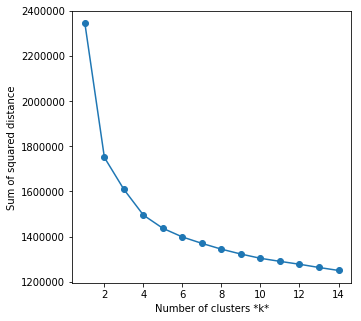

In [98]:
# Plot sse against k
plt.figure(figsize=(5, 5))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

Silhouette method:

To further confirm the clusters, we use indication from the Elbow method to see which cluster size that gives better average Silhouette score.

In [99]:
list_k = list(range(4, 7))
n_clusters = 4

for n_clusters in list_k:
    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=5)
    cluster_labels = clusterer.fit_predict(dataset_x)

    # The silhouette_score gives the average value for all the samples. This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(dataset_x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 4 The average silhouette_score is : 0.1323863116186846
For n_clusters = 5 The average silhouette_score is : 0.10445728077775106
For n_clusters = 6 The average silhouette_score is : 0.09682797576245693


### 3.3.2 Assigning the labels

With a chosen amount of clusters, we use random_state = 5 for reproducability, and display some preliminary results on the data.

In [100]:
n_clusters = 4

In [101]:
kmeans = KMeans(n_clusters=n_clusters, random_state=5)
kmeans = kmeans.fit(dataset_x)
labels = kmeans.predict(dataset_x)

We also create the centroids and get the identification of these.

In [102]:
centroids = kmeans.cluster_centers_
centroids

array([[0.45771384, 0.89797483, 0.93719471, 0.62728634, 3.69618854,
        0.07291332, 0.14686063, 0.56293008, 0.65974971, 0.52588512,
        0.17404714, 0.54130567, 0.72560345, 0.41945663, 0.40571184,
        0.39792135, 0.10518059, 0.40528399, 0.31586266, 0.06790388,
        0.21772382, 0.56781474, 0.19757906, 0.20649267, 0.57262809,
        0.20492388, 0.35501123, 0.50178124, 0.321193  , 1.36873819,
        0.43846044],
       [0.47693546, 0.96778237, 0.99014283, 0.81837736, 4.32086099,
        0.12068459, 0.14030608, 0.66629528, 0.70611083, 0.57799855,
        0.31849342, 0.53388113, 0.75278152, 0.49011962, 0.08733733,
        0.1967411 , 0.65422528, 0.06285688, 0.23004194, 0.60065302,
        0.03480185, 0.17281773, 0.79064729, 0.02494468, 0.14863129,
        0.82501586, 0.51295978, 0.49633906, 0.27765656, 3.65889853,
        0.6121969 ],
       [0.48121256, 0.67117604, 0.71259313, 0.35449233, 1.71490139,
        0.08889701, 0.17821768, 0.47978086, 0.58720234, 0.45776479,
      

Creating a variable names "StudentCategory" to place the created labels. We also show the mean scores for the four labels.

In [103]:
dataset['StudentCategory'] = labels
dataset[['StudentCategory', 'ScoreMathematics', 'ScoreScience', 'ScoreReading']].groupby(['StudentCategory'], as_index=True).mean().sort_values(by='ScoreScience', ascending=False)

,ScoreMathematics,ScoreScience,ScoreReading
StudentCategory,,,
1,527.354013,535.366931,532.363041
0,486.077546,491.242692,489.044638
3,462.232244,469.072815,466.722041
2,421.958572,431.117512,427.327697


Seeing there are clear mean score differences between the labels, we decide to name them accordingly.

In [104]:
dataset['StudentCategoryType'] = 0
dataset.loc[(dataset['StudentCategory'] == 2), 'StudentCategoryType'] = 'Low scoring group'
dataset.loc[(dataset['StudentCategory'] == 1), 'StudentCategoryType'] = 'High scoring group'
dataset.loc[(dataset['StudentCategory'] == 0), 'StudentCategoryType'] = 'Upper middle scoring group'
dataset.loc[(dataset['StudentCategory'] == 3), 'StudentCategoryType'] = 'Lower middle scoring group'

In [105]:
#StudentCategory
dataset[['StudentCategoryType', 'StudentCategory', 'ScoreMathematics', 'ScoreScience', 'ScoreReading']].groupby(['StudentCategoryType'], as_index=True).mean().sort_values(by='ScoreScience', ascending=False)

,StudentCategory,ScoreMathematics,ScoreScience,ScoreReading
StudentCategoryType,,,,
High scoring group,1,527.354013,535.366931,532.363041
Upper middle scoring group,0,486.077546,491.242692,489.044638
Lower middle scoring group,3,462.232244,469.072815,466.722041
Low scoring group,2,421.958572,431.117512,427.327697


### 3.3.3 Saving the data with labels to csv

In [106]:
dataset.to_csv('dataset_final_withlabels.csv', index=False)

In [107]:
dataset = pd.read_csv('dataset_final_withlabels.csv')

# 4 Results

We will in this chapter present the results of our analysis and the scripts to get meaning out of the data.

## 4.1 Descriptive statistics

Creating subset for each label and get basic descriptive statistics for each group, and lastly merge them into on dataframe.

In [108]:
dataset_cluster0 = dataset.loc[dataset['StudentCategory'] == 2]
dataset_cluster1 = dataset.loc[dataset['StudentCategory'] == 1]
dataset_cluster2 = dataset.loc[dataset['StudentCategory'] == 0]
dataset_cluster3 = dataset.loc[dataset['StudentCategory'] == 3]

In [109]:
data_descriptive_0 = dataset_cluster1.describe().loc[['count', 'mean', 'std', '50%']]
data_descriptive_1 = dataset_cluster2.describe().loc[['count', 'mean', 'std', '50%']]
data_descriptive_2 = dataset_cluster3.describe().loc[['count', 'mean', 'std', '50%']]
data_descriptive_3 = dataset_cluster0.describe().loc[['count', 'mean', 'std', '50%']]
data_descriptive = pd.concat([data_descriptive_0, data_descriptive_1, data_descriptive_2, data_descriptive_3])

In [110]:
data_descriptive

,CountryID,SchoolID,StudentID,Region,IsMale,HaveComputer,HaveInternet,HaveMusicalInstrument,BooksAtHome,EthnicGroupCategory,IsLonely,MusicActvityAtSchool,AvailableRoomForHomework,StaffHelpForHomework,IsPrivateSchool,FullyCertifiedTeacherStaff,StudentResultsTrackedCentrally,ClassesNotDividedByAbility,ScoreScience,ScoreReading,ScoreMathematics,FatherIsUnemployed,MotherIsUnemployed,FatherLowOccupationalStatus,FatherMiddleOccupationalStatus,FatherHighOccupationalStatus,MotherLowOccupationalStatus,MotherMiddleOccupationalStatus,MotherHighOccupationalStatus,FatherCompulsorySchoolIsHighest,FatherHighSchoolIsHighest,FatherHigherEducationIsHighest,MotherCompulsorySchoolIsHighest,MotherHighSchoolIsHighest,MotherHigherEducationIsHighest,IsCity,MaleSchoolRatio,CentralAuthorityDecidesCourseContents,ESCS_category,StudentExpectGoodJob,StudentCategory
count,64636.000000,6.463600e+04,6.463600e+04,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.000000,64636.0
mean,484.096603,4.841074e+07,4.841762e+07,45720.142939,0.477041,0.967789,0.990145,0.818275,4.320270,0.120707,0.140262,0.666192,0.705953,0.577913,0.318445,0.533774,0.752878,0.490098,535.366931,532.363041,527.354013,0.061684,0.106427,0.087304,0.196717,0.654295,0.062860,0.229996,0.600718,0.034810,0.172860,0.790597,0.024940,0.148756,0.824896,0.512857,0.496371,0.277755,3.659277,0.612182,1.0
std,296.600930,2.965970e+07,2.966066e+07,26689.884500,0.499476,0.176562,0.098784,0.385621,0.753374,0.325789,0.347262,0.471576,0.455617,0.493896,0.465877,0.498862,0.431342,0.499906,90.740393,90.090710,89.579342,0.240582,0.308385,0.282283,0.397520,0.475601,0.242712,0.420833,0.489755,0.183301,0.378129,0.406886,0.155942,0.355851,0.380059,0.499839,0.175129,0.447896,0.504045,0.487256,0.0
50%,440.000000,4.400030e+07,4.400743e+07,44000.000000,0.000000,1.000000,1.000000,1.000000,4.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,540.089500,539.555500,531.268000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.500285,0.000000,4.000000,1.000000,1.0
count,56097.000000,5.609700e+04,5.609700e+04,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.000000,56097.0
mean,515.163823,5.151706e+07,5.152359e+07,48447.730877,0.457689,0.897998,0.937198,0.627342,3.696526,0.072909,0.146888,0.563007,0.659804,0.525946,0.174073,0.541295,0.725511,0.419381,491.242692,489.044638,486.077546,0.091181,0.210956,0.405601,0.398007,0.105211,0.405155,0.315988,0.067900,0.217712,0.567677,0.197747,0.206482,0.572473,0.205091,0.355081,0.501770,0.321211,1.369093,0.438508,0.0
std,290.803585,2.908010e+07,2.908203e+07,25425.250868,0.498211,0.302653,0.242609,0.483516,0.780261,0.259990,0.353998,0.496019,0.473779,0.499331,0.379176,0.498296,0.446260,0.493462,89.830303,90.958429,89.640291,0.287869,0.407991,0.491012,0.489491,0.306827,0.490926,0.464912,0.251577,0.412694,0.495403,0.398304,0.404784,0.494724,0.403772,0.478542,0.170098,0.466946,0.656201,0.496209,0.0
50%,446.000000,4.460004e+07,4.460432e+07,44600.000000,0.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.00

## 4.2 Score distributions

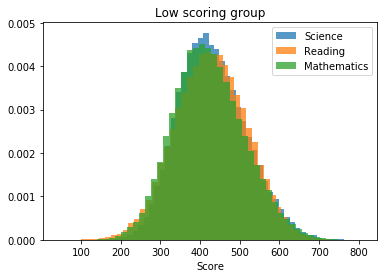

In [111]:
plt.hist(dataset_cluster0['ScoreScience'], bins=50, density=True, alpha=0.75, label='Science')
plt.hist(dataset_cluster0['ScoreReading'], bins=50, density=True, alpha=0.75, label='Reading')
plt.hist(dataset_cluster0['ScoreMathematics'], bins=50, density=True, alpha=0.75, label='Mathematics')
plt.legend()
plt.xlabel('Score')
plt.title('Low scoring group')
plt.show()

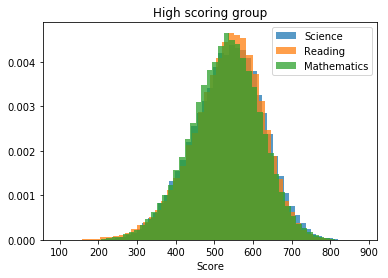

In [112]:
plt.hist(dataset_cluster1['ScoreScience'], bins=50, density=True, alpha=0.75, label='Science')
plt.hist(dataset_cluster1['ScoreReading'], bins=50, density=True, alpha=0.75, label='Reading')
plt.hist(dataset_cluster1['ScoreMathematics'], bins=50, density=True, alpha=0.75, label='Mathematics')
plt.legend()
plt.xlabel('Score')
plt.title('High scoring group')
plt.show()

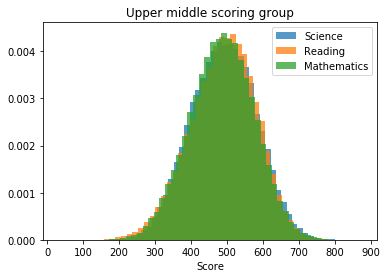

In [113]:
plt.hist(dataset_cluster2['ScoreScience'], bins=50, density=True, alpha=0.75, label='Science')
plt.hist(dataset_cluster2['ScoreReading'], bins=50, density=True, alpha=0.75, label='Reading')
plt.hist(dataset_cluster2['ScoreMathematics'], bins=50, density=True, alpha=0.75, label='Mathematics')
plt.legend()
plt.xlabel('Score')
plt.title('Upper middle scoring group')
plt.xticks(np.arange(0, 1000, 100))
plt.show()

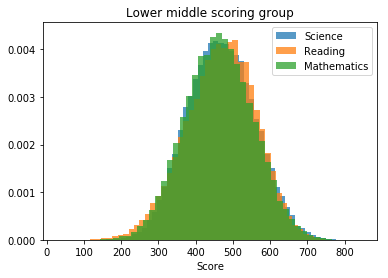

In [114]:
plt.hist(dataset_cluster3['ScoreScience'], bins=50, density=True, alpha=0.75, label='Science')
plt.hist(dataset_cluster3['ScoreReading'], bins=50, density=True, alpha=0.75, label='Reading')
plt.hist(dataset_cluster3['ScoreMathematics'], bins=50, density=True, alpha=0.75, label='Mathematics')
plt.legend()
plt.xlabel('Score')
plt.title('Lower middle scoring group')
plt.show()

### 4.2.1 Average scores by country

In [115]:
#StudentCategory
dataset[['CountryName', 'StudentCategoryType', 'ScoreScience', 'ScoreReading', 'ScoreMathematics']].groupby(['CountryName', 'StudentCategoryType'], as_index=True).mean().sort_values(by='CountryName', ascending=True)

ScoreScience  \
CountryName                                        StudentCategoryType                        
Algeria                                            High scoring group            433.146656   
                                                   Low scoring group             382.133150   
                                                   Lower middle scoring group    402.748903   
                                                   Upper middle scoring group    395.115792   
Argentina                                          High scoring group            525.466507   
                                                   Low scoring group             424.205782   
                                                   Lower middle scoring group    476.268673   
                                                   Upper middle scoring group    470.548033   
Australia                                          High scoring group            556.458418   
                                                   Low scoring group             441.000743   
                                                   Lower middle scoring group    484.617726   
                                                   Upper middle scoring group    504.710173   
Belgium                                            Upper middle scoring group    495.128331   
                                                   Lower middle scoring group    470.379621   
                                                   High scoring group            548.735386   
                                                   Low scoring group             438.418369   
Brazil                                             High scoring group            496.825971   
                                                   Low scoring group             401.152464   
                                                   Lower middle scoring group    441.773661   
                                                   Upper middle scoring group    433.837644   
Bulgaria                                           High scoring group            516.305523   
                                                   Low scoring group             404.489848   
                                                   Lower middle scoring group    451.710163   
                                                   Upper middle scoring group    467.089015   
Canada                                             High scoring group            554.291235   
                                                   Low scoring group             470.672429   
                                                   Lower middle scoring group    499.437182   
                                                   Upper middle scoring group    517.962677   
Chile                                              Upper middle scoring group    472.914340   
                                                   Lower middle scoring group    474.816820   
...                                                                                     ...   
Trinidad and Tobago                                High scoring group            482.733101   
                                                   Low scoring group             398.856079   
Tunisia                                            High scoring group            443.725391   
                                                   Low scoring group             381.860243   
                                                   Lower middle scoring group    408.256552   
                                                   Upper middle scoring group    403.287116   
Turkey                                             High scoring group            493.451891   
                                                   Low scoring group             414.453156   
                                                   Lower middle scoring group    443.547487   
                                                   Upper middle scoring group    457.8295

## 4.3 T-tests / hypothesis testing

### 4.3.1 Validation of method

The t-test requires that the variable is approximately normally distributed in each group. It it also assumed homogeneity of variance.

This can be tested using Levene's Test of Equality. This will be tested for each comparison group for hypothesis testing.

### 4.3.2 Between the clusters

This subchapter shows the results for mean score differences between the cluster labels.

Science:

In [116]:
t2, p2 = stats.ttest_ind(dataset_cluster0['ScoreScience'], dataset_cluster1['ScoreScience'])
print("t-0,1 = " + str(t2))
print("p = " + str(p2))

t2, p2 = stats.ttest_ind(dataset_cluster0['ScoreScience'], dataset_cluster2['ScoreScience'])
print("t-0,2 = " + str(t2))
print("p = " + str(p2))

t2, p2 = stats.ttest_ind(dataset_cluster0['ScoreScience'], dataset_cluster3['ScoreScience'])
print("t-0,3 = " + str(t2))
print("p = " + str(p2))

t2, p2 = stats.ttest_ind(dataset_cluster1['ScoreScience'], dataset_cluster2['ScoreScience'])
print("t-1,2 = " + str(t2))
print("p = " + str(p2))

t2, p2 = stats.ttest_ind(dataset_cluster1['ScoreScience'], dataset_cluster3['ScoreScience'])
print("t-1,3 = " + str(t2))
print("p = " + str(p2))

t2, p2 = stats.ttest_ind(dataset_cluster2['ScoreScience'], dataset_cluster3['ScoreScience'])
print("t-2,3 = " + str(t2))
print("p = " + str(p2))

t-0,1 = -216.65272878346715
p = 0.0
t-0,2 = -121.20679043926911
p = 0.0
t-0,3 = -77.12129248357076
p = 0.0
t-1,2 = 84.66301743839702
p = 0.0
t-1,3 = 128.25780476272183
p = 0.0
t-2,3 = 41.64407415508328
p = 0.0


All clusters in science have mean score significantly different from zero.

Reading:

In [117]:
t2, p2 = stats.ttest_ind(dataset_cluster0['ScoreReading'], dataset_cluster1['ScoreReading'])
print("t-0,1 = " + str(t2))
print("p = " + str(p2))

t2, p2 = stats.ttest_ind(dataset_cluster0['ScoreReading'], dataset_cluster2['ScoreReading'])
print("t-0,2 = " + str(t2))
print("p = " + str(p2))

t2, p2 = stats.ttest_ind(dataset_cluster0['ScoreReading'], dataset_cluster3['ScoreReading'])
print("t-0,3 = " + str(t2))
print("p = " + str(p2))

t2, p2 = stats.ttest_ind(dataset_cluster1['ScoreReading'], dataset_cluster2['ScoreReading'])
print("t-1,2 = " + str(t2))
print("p = " + str(p2))

t2, p2 = stats.ttest_ind(dataset_cluster1['ScoreReading'], dataset_cluster3['ScoreReading'])
print("t-1,3 = " + str(t2))
print("p = " + str(p2))

t2, p2 = stats.ttest_ind(dataset_cluster2['ScoreReading'], dataset_cluster3['ScoreReading'])
print("t-2,3 = " + str(t2))
print("p = " + str(p2))

t-0,1 = -213.86854748529458
p = 0.0
t-0,2 = -120.53682815828564
p = 0.0
t-0,3 = -76.56732532726235
p = 0.0
t-1,2 = 82.95494916798692
p = 0.0
t-1,3 = 125.04594020714511
p = 0.0
t-2,3 = 40.82847007405134
p = 0.0


All clusters in reading have mean score significantly different from zero.

Mathematics:

In [118]:
t2, p2 = stats.ttest_ind(dataset_cluster0['ScoreMathematics'], dataset_cluster1['ScoreMathematics'])
print("t-0,1 = " + str(t2))
print("p = " + str(p2))

t2, p2 = stats.ttest_ind(dataset_cluster0['ScoreMathematics'], dataset_cluster2['ScoreMathematics'])
print("t-0,2 = " + str(t2))
print("p = " + str(p2))

t2, p2 = stats.ttest_ind(dataset_cluster0['ScoreMathematics'], dataset_cluster3['ScoreMathematics'])
print("t-0,3 = " + str(t2))
print("p = " + str(p2))

t2, p2 = stats.ttest_ind(dataset_cluster1['ScoreMathematics'], dataset_cluster2['ScoreMathematics'])
print("t-1,2 = " + str(t2))
print("p = " + str(p2))

t2, p2 = stats.ttest_ind(dataset_cluster1['ScoreMathematics'], dataset_cluster3['ScoreMathematics'])
print("t-1,3 = " + str(t2))
print("p = " + str(p2))

t2, p2 = stats.ttest_ind(dataset_cluster2['ScoreMathematics'], dataset_cluster3['ScoreMathematics'])
print("t-2,3 = " + str(t2))
print("p = " + str(p2))

t-0,1 = -215.49504022205443
p = 0.0
t-0,2 = -126.25091232082102
p = 0.0
t-0,3 = -79.51130239245755
p = 0.0
t-1,2 = 79.82729370330432
p = 0.0
t-1,3 = 126.24105757943943
p = 0.0
t-2,3 = 44.60717364488549
p = 0.0


All clusters in mathematics have mean score significantly different from zero.

### 4.3.3 Hypothesis testing

The following provides results for various combination of explanatory variables.

We look into these variables:
* Music activity at school
* Gender
* City
* CentralAuthorityDecidesCourseContent


#### 4.3.3.1 Music activity at school

In [119]:
dataset_t0 = dataset.loc[(dataset['MusicActvityAtSchool'] == 1)]
dataset_t1 = dataset.loc[(dataset['MusicActvityAtSchool'] == 0)]

In [120]:
print('t0: ', dataset_t0[['ScoreScience', 'ScoreReading', 'ScoreMathematics']].describe().loc[['mean']])
print('t1: ', dataset_t1[['ScoreScience', 'ScoreReading', 'ScoreMathematics']].describe().loc[['mean']])

t0:        ScoreScience  ScoreReading  ScoreMathematics
mean    495.023995    491.568351        487.476126
t1:        ScoreScience  ScoreReading  ScoreMathematics
mean    461.782253    459.671409        454.562275


In [121]:
#Science
t2, p2 = stats.ttest_ind(dataset_t0['ScoreScience'], dataset_t1['ScoreScience'])
print("t-science = " + str(t2))
print("p = " + str(p2))

#Reading
t2, p2 = stats.ttest_ind(dataset_t0['ScoreReading'], dataset_t1['ScoreReading'])
print("t-reading = " + str(t2))
print("p = " + str(p2))

#T-test
t2, p2 = stats.ttest_ind(dataset_t0['ScoreMathematics'], dataset_t1['ScoreMathematics'])
print("t-math = " + str(t2))
print("p = " + str(p2))

t-science = 85.51109213604606
p = 0.0
t-reading = 80.22261493372893
p = 0.0
t-math = 83.69213275229215
p = 0.0


#### 4.3.3.1a Music activity at school and gender (male)

In [122]:
dataset_t0 = dataset.loc[(dataset['IsMale'] == 1) & (dataset['MusicActvityAtSchool'] == 1)]
dataset_t1 = dataset.loc[(dataset['IsMale'] == 1) & (dataset['MusicActvityAtSchool'] == 0)]

In [123]:
print('t0: ', dataset_t0[['ScoreScience', 'ScoreReading', 'ScoreMathematics']].describe().loc[['mean']])
print('t1: ', dataset_t1[['ScoreScience', 'ScoreReading', 'ScoreMathematics']].describe().loc[['mean']])

t0:        ScoreScience  ScoreReading  ScoreMathematics
mean    498.649847    480.570264        493.622969
t1:        ScoreScience  ScoreReading  ScoreMathematics
mean    464.185165    447.867827        460.148873


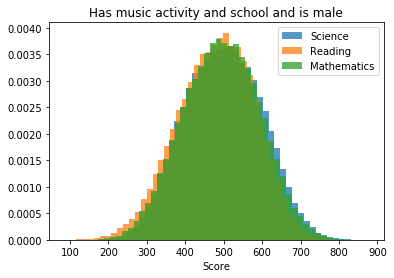

In [124]:
plt.hist(dataset_t0['ScoreScience'], bins=50, density=True, alpha=0.75, label='Science')
plt.hist(dataset_t0['ScoreReading'], bins=50, density=True, alpha=0.75, label='Reading')
plt.hist(dataset_t0['ScoreMathematics'], bins=50, density=True, alpha=0.75, label='Mathematics')
plt.legend()
plt.xlabel('Score')
plt.title('Has music activity and school and is male')
plt.show()

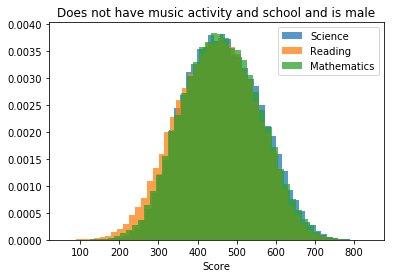

In [125]:
plt.hist(dataset_t1['ScoreScience'], bins=50, density=True, alpha=0.75, label='Science')
plt.hist(dataset_t1['ScoreReading'], bins=50, density=True, alpha=0.75, label='Reading')
plt.hist(dataset_t1['ScoreMathematics'], bins=50, density=True, alpha=0.75, label='Mathematics')
plt.legend()
plt.xlabel('Score')
plt.title('Does not have music activity and school and is male')
plt.show()

In [126]:
print('Science: ', stats.levene(dataset_t0['ScoreScience'], dataset_t1['ScoreScience'], center='mean'))
print('Reading: ', stats.levene(dataset_t0['ScoreReading'], dataset_t1['ScoreReading'], center='mean'))
print('Mathematics: ', stats.levene(dataset_t0['ScoreMathematics'], dataset_t1['ScoreMathematics'], center='mean'))

Science:  LeveneResult(statistic=42.253582469469855, pvalue=8.048649575329181e-11)
Reading:  LeveneResult(statistic=25.777763528390985, pvalue=3.83649180000465e-07)
Mathematics:  LeveneResult(statistic=14.312885040996205, pvalue=0.00015487694285356155)


The data seems to be normally distributed and the Levene-test is not rejected, so the variances can be treated as equal. We can therefore apply our hypothesis test:

In [127]:
#Science
t2, p2 = stats.ttest_ind(dataset_t0['ScoreScience'], dataset_t1['ScoreScience'])
print("t-science = " + str(t2))
print("p = " + str(p2))

#Reading
t2, p2 = stats.ttest_ind(dataset_t0['ScoreReading'], dataset_t1['ScoreReading'])
print("t-reading = " + str(t2))
print("p = " + str(p2))

#T-test
t2, p2 = stats.ttest_ind(dataset_t0['ScoreMathematics'], dataset_t1['ScoreMathematics'])
print("t-math = " + str(t2))
print("p = " + str(p2))

t-science = 59.91719176866704
p = 0.0
t-reading = 55.99045376713646
p = 0.0
t-math = 58.11853698121848
p = 0.0


Results indicates that there is a significant difference for male students and whether they have music activity at school or not.

#### 4.3.3.1b Music activity at school and gender (female)

In [128]:
dataset_t0 = dataset.loc[(dataset['IsMale'] == 0) & (dataset['MusicActvityAtSchool'] == 1)]
dataset_t1 = dataset.loc[(dataset['IsMale'] == 0) & (dataset['MusicActvityAtSchool'] == 0)]

In [129]:
print('t0: ', dataset_t0[['ScoreScience', 'ScoreReading', 'ScoreMathematics']].describe().loc[['mean']])
print('t1: ', dataset_t1[['ScoreScience', 'ScoreReading', 'ScoreMathematics']].describe().loc[['mean']])

t0:        ScoreScience  ScoreReading  ScoreMathematics
mean    491.725675    501.572954        481.884542
t1:        ScoreScience  ScoreReading  ScoreMathematics
mean    459.428515    471.233438        449.090003


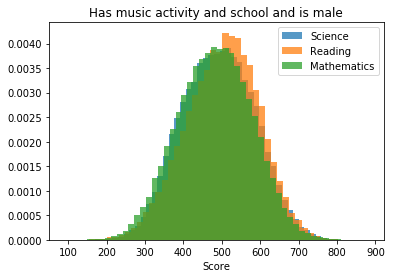

In [130]:
plt.hist(dataset_t0['ScoreScience'], bins=50, density=True, alpha=0.75, label='Science')
plt.hist(dataset_t0['ScoreReading'], bins=50, density=True, alpha=0.75, label='Reading')
plt.hist(dataset_t0['ScoreMathematics'], bins=50, density=True, alpha=0.75, label='Mathematics')
plt.legend()
plt.xlabel('Score')
plt.title('Has music activity and school and is male')
plt.show()

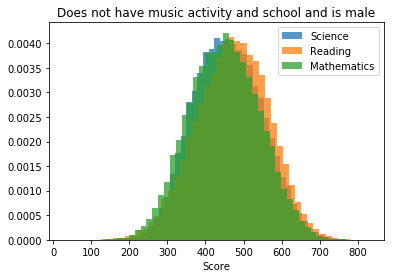

In [131]:
plt.hist(dataset_t1['ScoreScience'], bins=50, density=True, alpha=0.75, label='Science')
plt.hist(dataset_t1['ScoreReading'], bins=50, density=True, alpha=0.75, label='Reading')
plt.hist(dataset_t1['ScoreMathematics'], bins=50, density=True, alpha=0.75, label='Mathematics')
plt.legend()
plt.xlabel('Score')
plt.title('Does not have music activity and school and is male')
plt.show()

In [132]:
print('Science: ', stats.levene(dataset_t0['ScoreScience'], dataset_t1['ScoreScience'], center='mean'))
print('Reading: ', stats.levene(dataset_t0['ScoreReading'], dataset_t1['ScoreReading'], center='mean'))
print('Mathematics: ', stats.levene(dataset_t0['ScoreMathematics'], dataset_t1['ScoreMathematics'], center='mean'))

Science:  LeveneResult(statistic=158.02294316281277, pvalue=3.2146850789414696e-36)
Reading:  LeveneResult(statistic=0.000274213126279892, pvalue=0.9867881544609873)
Mathematics:  LeveneResult(statistic=49.53494328117559, pvalue=1.95846783609544e-12)


The data seems to be normally distributed and the Levene-test is not rejected, so the variances can be treated as equal. We can therefore apply our hypothesis test:

In [133]:
#Science
t2, p2 = stats.ttest_ind(dataset_t0['ScoreScience'], dataset_t1['ScoreScience'])
print("t-science = " + str(t2))
print("p = " + str(p2))

#Reading
t2, p2 = stats.ttest_ind(dataset_t0['ScoreReading'], dataset_t1['ScoreReading'])
print("t-reading = " + str(t2))
print("p = " + str(p2))

#T-test
t2, p2 = stats.ttest_ind(dataset_t0['ScoreMathematics'], dataset_t1['ScoreMathematics'])
print("t-math = " + str(t2))
print("p = " + str(p2))

t-science = 61.48973529346867
p = 0.0
t-reading = 56.7255374974315
p = 0.0
t-math = 61.21211019923458
p = 0.0


Results indicates that there is a significant difference for female students and whether they have music activity at school or not.

#### 4.3.3.2 CentralAuthorityDecidesCourseContents

In [134]:
dataset_t0 = dataset.loc[(dataset['CentralAuthorityDecidesCourseContents'] == 1)]
dataset_t1 = dataset.loc[(dataset['CentralAuthorityDecidesCourseContents'] == 0)]

In [135]:
print('t0: ', dataset_t0[['ScoreScience', 'ScoreReading', 'ScoreMathematics']].describe().loc[['mean']])
print('t1: ', dataset_t1[['ScoreScience', 'ScoreReading', 'ScoreMathematics']].describe().loc[['mean']])

t0:        ScoreScience  ScoreReading  ScoreMathematics
mean    463.353105    461.558706        452.956583
t1:        ScoreScience  ScoreReading  ScoreMathematics
mean    490.092023    486.637692        484.241662


In [136]:
#Science
t2, p2 = stats.ttest_ind(dataset_t0['ScoreScience'], dataset_t1['ScoreScience'])
print("t-science = " + str(t2))
print("p = " + str(p2))

#Reading
t2, p2 = stats.ttest_ind(dataset_t0['ScoreReading'], dataset_t1['ScoreReading'])
print("t-reading = " + str(t2))
print("p = " + str(p2))

#T-test
t2, p2 = stats.ttest_ind(dataset_t0['ScoreMathematics'], dataset_t1['ScoreMathematics'])
print("t-math = " + str(t2))
print("p = " + str(p2))

t-science = -65.67043467357821
p = 0.0
t-reading = -60.24254910549297
p = 0.0
t-math = -76.22227805398433
p = 0.0


#### 4.3.3.2a CentralAuthorityDecidesCourseContents and gender (male)

In [137]:
dataset_t0 = dataset.loc[(dataset['IsMale'] == 1) & (dataset['CentralAuthorityDecidesCourseContents'] == 1)]
dataset_t1 = dataset.loc[(dataset['IsMale'] == 1) & (dataset['CentralAuthorityDecidesCourseContents'] == 0)]

In [138]:
print('t0: ', dataset_t0[['ScoreScience', 'ScoreReading', 'ScoreMathematics']].describe().loc[['mean']])
print('t1: ', dataset_t1[['ScoreScience', 'ScoreReading', 'ScoreMathematics']].describe().loc[['mean']])

t0:        ScoreScience  ScoreReading  ScoreMathematics
mean    464.676387    448.513461          458.2971
t1:        ScoreScience  ScoreReading  ScoreMathematics
mean    493.417661    475.514069         489.72865


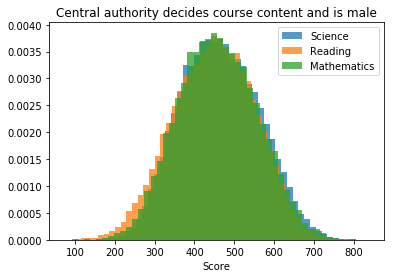

In [139]:
plt.hist(dataset_t0['ScoreScience'], bins=50, density=True, alpha=0.75, label='Science')
plt.hist(dataset_t0['ScoreReading'], bins=50, density=True, alpha=0.75, label='Reading')
plt.hist(dataset_t0['ScoreMathematics'], bins=50, density=True, alpha=0.75, label='Mathematics')
plt.legend()
plt.xlabel('Score')
plt.title('Central authority decides course content and is male')
plt.show()

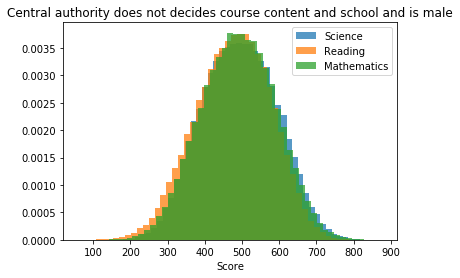

In [140]:
plt.hist(dataset_t1['ScoreScience'], bins=50, density=True, alpha=0.75, label='Science')
plt.hist(dataset_t1['ScoreReading'], bins=50, density=True, alpha=0.75, label='Reading')
plt.hist(dataset_t1['ScoreMathematics'], bins=50, density=True, alpha=0.75, label='Mathematics')
plt.legend()
plt.xlabel('Score')
plt.title('Central authority does not decides course content and school and is male')
plt.show()

In [141]:
print('Science: ', stats.levene(dataset_t0['ScoreScience'], dataset_t1['ScoreScience'], center='mean'))
print('Reading: ', stats.levene(dataset_t0['ScoreReading'], dataset_t1['ScoreReading'], center='mean'))
print('Mathematics: ', stats.levene(dataset_t0['ScoreMathematics'], dataset_t1['ScoreMathematics'], center='mean'))

Science:  LeveneResult(statistic=14.264545358466538, pvalue=0.0001589053441769714)
Reading:  LeveneResult(statistic=15.954512710727732, pvalue=6.492165043693234e-05)
Mathematics:  LeveneResult(statistic=1.6318460450646364, pvalue=0.2014503820842267)


The data seems to be normally distributed and the Levene-test is not rejected (except for science), so the variances are likely to be treated as equal. We can therefore apply our hypothesis test:

In [142]:
#Science
t2, p2 = stats.ttest_ind(dataset_t0['ScoreScience'], dataset_t1['ScoreScience'])
print("t-science = " + str(t2))
print("p = " + str(p2))

#Reading
t2, p2 = stats.ttest_ind(dataset_t0['ScoreReading'], dataset_t1['ScoreReading'])
print("t-reading = " + str(t2))
print("p = " + str(p2))

#T-test
t2, p2 = stats.ttest_ind(dataset_t0['ScoreMathematics'], dataset_t1['ScoreMathematics'])
print("t-math = " + str(t2))
print("p = " + str(p2))

t-science = -47.42590469139008
p = 0.0
t-reading = -43.90043909940878
p = 0.0
t-math = -51.93676105829361
p = 0.0


Results indicates that there is a significant difference for male students and whether central authorities decides course contents or not.

#### 4.3.3.2b CentralAuthorityDecidesCourseContents and gender (female)

In [143]:
dataset_t0 = dataset.loc[(dataset['IsMale'] == 0) & (dataset['CentralAuthorityDecidesCourseContents'] == 1)]
dataset_t1 = dataset.loc[(dataset['IsMale'] == 0) & (dataset['CentralAuthorityDecidesCourseContents'] == 0)]

In [144]:
print('t0: ', dataset_t0[['ScoreScience', 'ScoreReading', 'ScoreMathematics']].describe().loc[['mean']])
print('t1: ', dataset_t1[['ScoreScience', 'ScoreReading', 'ScoreMathematics']].describe().loc[['mean']])

t0:        ScoreScience  ScoreReading  ScoreMathematics
mean    462.146306    473.455635        448.086169
t1:        ScoreScience  ScoreReading  ScoreMathematics
mean    486.922954    497.237622        479.012998


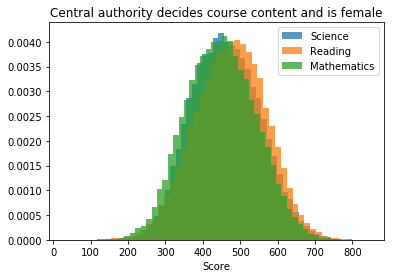

In [145]:
plt.hist(dataset_t0['ScoreScience'], bins=50, density=True, alpha=0.75, label='Science')
plt.hist(dataset_t0['ScoreReading'], bins=50, density=True, alpha=0.75, label='Reading')
plt.hist(dataset_t0['ScoreMathematics'], bins=50, density=True, alpha=0.75, label='Mathematics')
plt.legend()
plt.xlabel('Score')
plt.title('Central authority decides course content and is female')
plt.show()

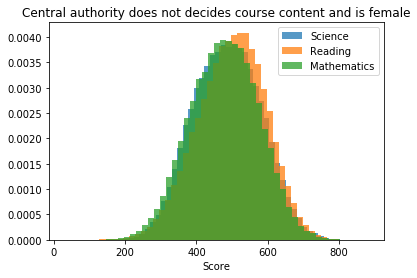

In [146]:
plt.hist(dataset_t1['ScoreScience'], bins=50, density=True, alpha=0.75, label='Science')
plt.hist(dataset_t1['ScoreReading'], bins=50, density=True, alpha=0.75, label='Reading')
plt.hist(dataset_t1['ScoreMathematics'], bins=50, density=True, alpha=0.75, label='Mathematics')
plt.legend()
plt.xlabel('Score')
plt.title('Central authority does not decides course content and is female')
plt.show()

In [147]:
print('Science: ', stats.levene(dataset_t0['ScoreScience'], dataset_t1['ScoreScience'], center='mean'))
print('Reading: ', stats.levene(dataset_t0['ScoreReading'], dataset_t1['ScoreReading'], center='mean'))
print('Mathematics: ', stats.levene(dataset_t0['ScoreMathematics'], dataset_t1['ScoreMathematics'], center='mean'))

Science:  LeveneResult(statistic=94.59084096414192, pvalue=2.383272476229727e-22)
Reading:  LeveneResult(statistic=0.09557488477575697, pvalue=0.757206501454372)
Mathematics:  LeveneResult(statistic=32.48971304166713, pvalue=1.2008839996088462e-08)


The data seems to be normally distributed and the Levene-test is not rejected, so the variances are can be treated as equal. We can therefore apply our hypothesis test:

In [148]:
#Science
t2, p2 = stats.ttest_ind(dataset_t0['ScoreScience'], dataset_t1['ScoreScience'])
print("t-science = " + str(t2))
print("p = " + str(p2))

#Reading
t2, p2 = stats.ttest_ind(dataset_t0['ScoreReading'], dataset_t1['ScoreReading'])
print("t-reading = " + str(t2))
print("p = " + str(p2))

#T-test
t2, p2 = stats.ttest_ind(dataset_t0['ScoreMathematics'], dataset_t1['ScoreMathematics'])
print("t-math = " + str(t2))
print("p = " + str(p2))

t-science = -45.283376568013175
p = 0.0
t-reading = -42.739945045492085
p = 0.0
t-math = -55.64564037761867
p = 0.0


Results indicates that there is a significant difference for male students and whether central authorities decides course contents or not.

# 5 Conclusion

This analysis is limited by being a summer school project.

The datasets used in this notebook can be used for furtherly in-depth analysis.

Nevertheless, to sum up what has been done and results found in this notebook:
* Using K-means (4 clusters) to label the data. This was done to remove any subject selection criteria. 
* The clusters have different particularities and descriptive statistics - confirming general educational research
* Music activity at school seems to increase students' performance
* Central authorities deciding course contents seems to have adverse effects on students. This can be a policy recommendation that local and school specific (principals and teachers) are better suited to decide course content.

NameError: name 'dataset' is not defined